In [65]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime
import numpy as np

In [66]:
# Get data
os.system("./get_data.sh")

0

data_12
data_13
data directory: data/data_13
f_name:  data/data_13/epi-bf-6c66ddf845-p6c24.txt


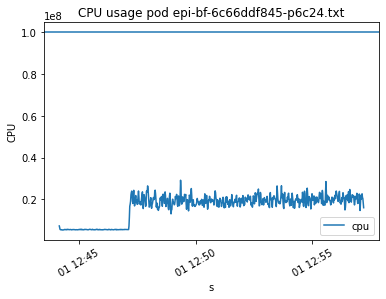

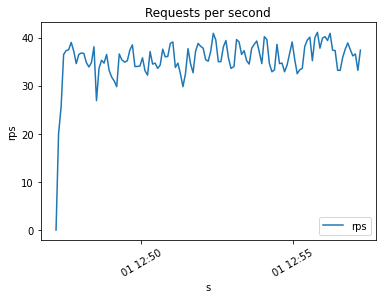

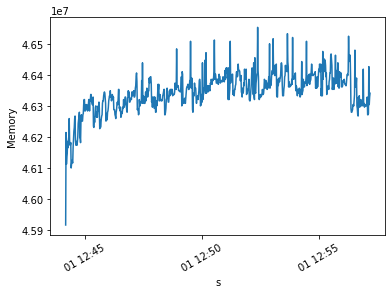

data_11
data_5
data_10
data_4
data_8
data_2
data_3
data_7
data_9
data_6


In [70]:
def get_time_in_s(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

def get_time_date(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    return x

def locust_get_time(x):
    return datetime.strptime(x, "%H:%M:%S")

main_data_dir="data"
for d_name in os.listdir(main_data_dir):
    print(d_name)
    if d_name != "data_13":
        continue
    data_directory = f"{main_data_dir}/{d_name}"
    print(f"data directory: {data_directory}")
    locust_csv = f"{data_directory}/locust_data.csv"
    df_locust = pd.read_csv(locust_csv)
    df_locust['time'] = df_locust['time'].apply(lambda x: locust_get_time(x))
#     print(df_locust.head())

    for pod in os.listdir(data_directory):
        if pod.startswith("locust"):
            break
        f_name = f"{data_directory}/" + pod
        print("f_name: ", f_name)
        df = pd.read_csv(f_name, delimiter=",")

        df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
        df["Time_in_s"] = df["Time_in_s"] - df["Time_in_s"][0]

        df["Time_datetime"] = df["Time"].apply(lambda x: get_time_date(x))

#         print(df_locust["values"], df["CPU"])
        plt.title(f"CPU usage pod {pod}")
        plt.plot(df["Time_datetime"], np.gradient(df["CPU"]), label="cpu")
        # 10000 microseconds times 1000 is nanoseconds
        plt.axhline(100000*1000)
        plt.xlabel("s")
        plt.ylabel("CPU")
        plt.xticks(rotation=30)
        plt.legend()
        plt.show()
        
        plt.title("Requests per second")
        plt.plot(df_locust["time"], df_locust["values"], label="rps")
        plt.xlabel("s")
        plt.ylabel("rps")
        plt.xticks(rotation=30)
        plt.legend()
        plt.show()
        plt.plot(df["Time_datetime"], df["Memory"])
        plt.xlabel("s")
        plt.xticks(rotation=30)
        plt.ylabel("Memory")
        plt.show()
    exit(1)